# Decision Tree & Random Forest

In [270]:
#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [272]:
data=r"C:\Users\admin\Downloads\Company_Data.csv"

In [274]:
df=pd.read_csv(data)

In [276]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [278]:
df.shape

(400, 11)

In [280]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [284]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [286]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [288]:
df.ShelveLoc.unique()

array(['Bad', 'Good', 'Medium'], dtype=object)

array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'CompPrice'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Advertising'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>, <Axes: >]], dtype=object)

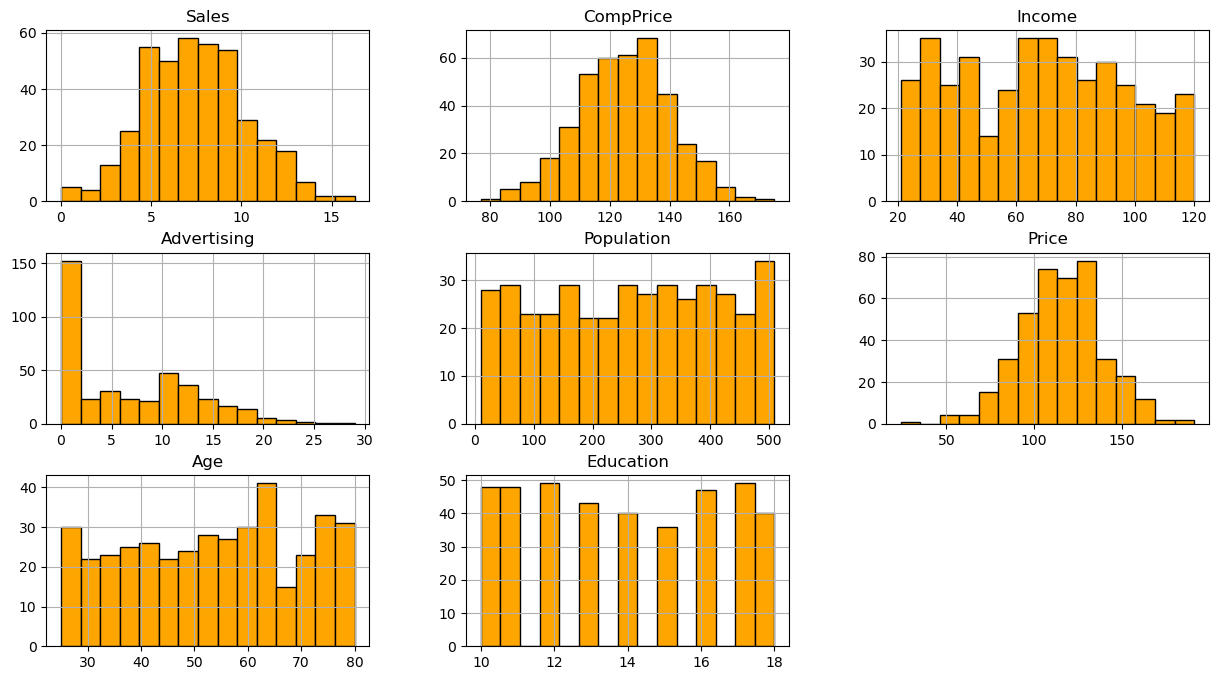

In [290]:
df.hist(figsize=(15,8),bins=15,edgecolor='black',color='orange')

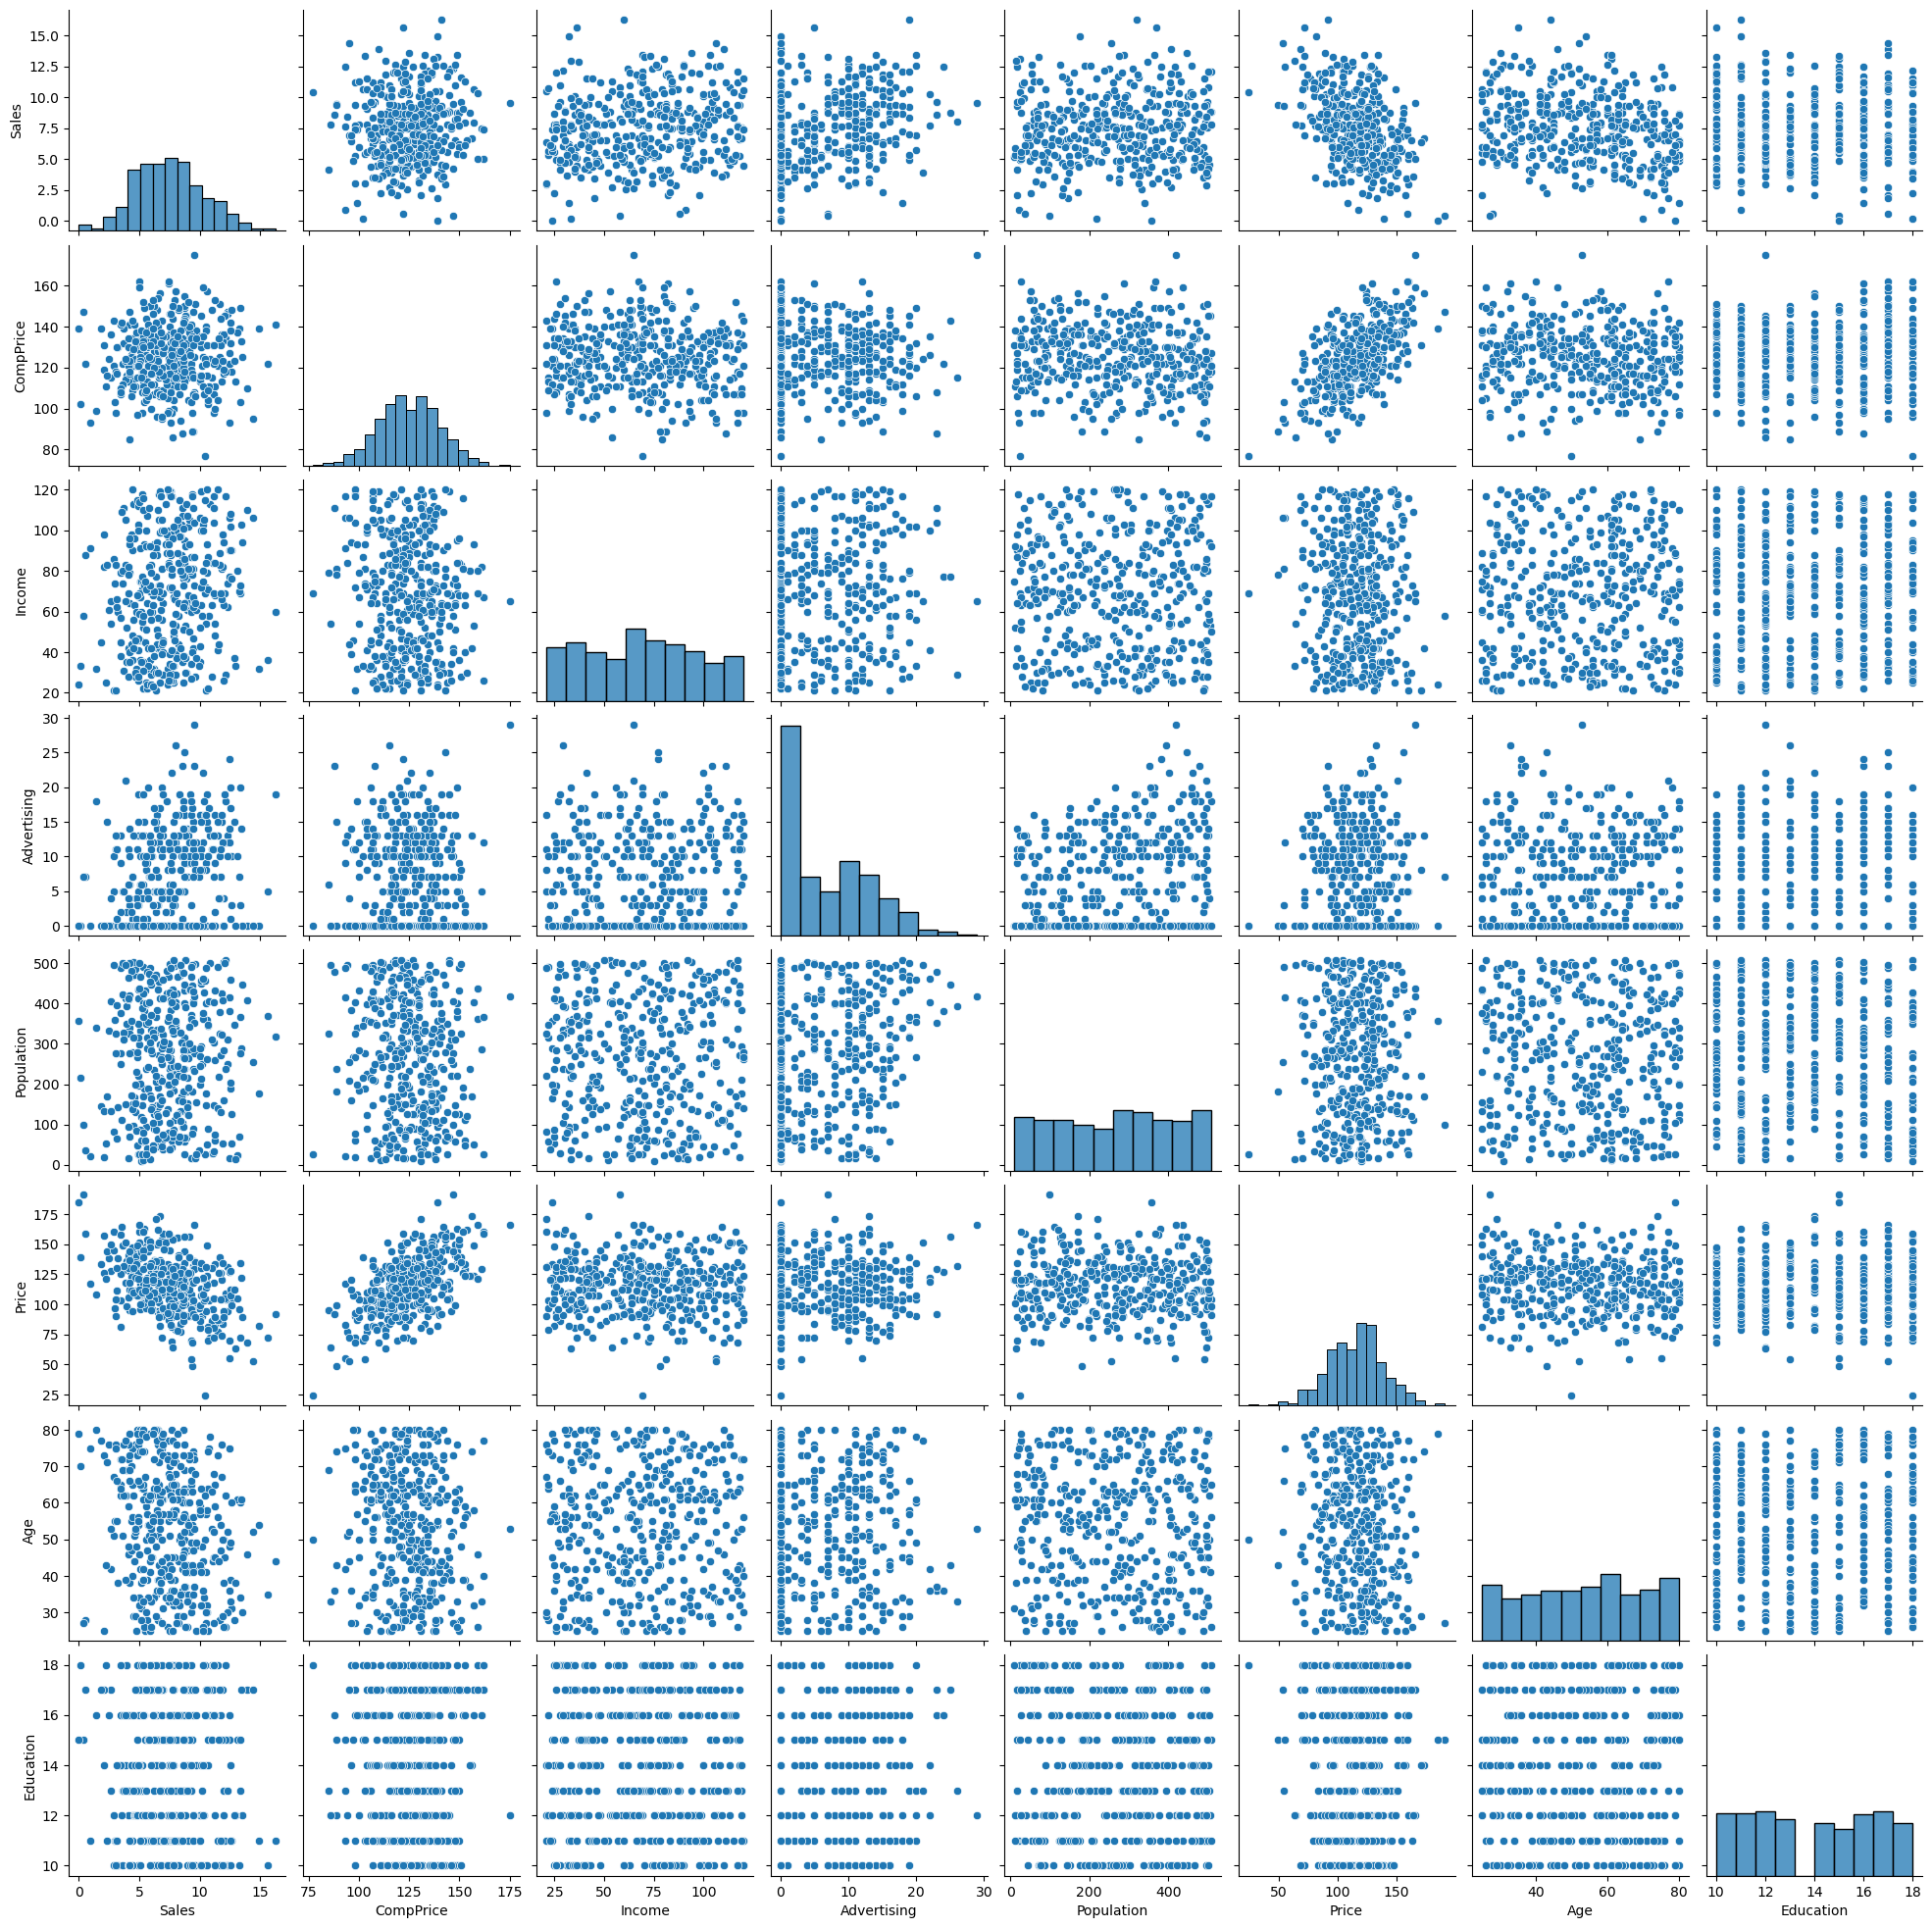

In [39]:
sns.pairplot(df)

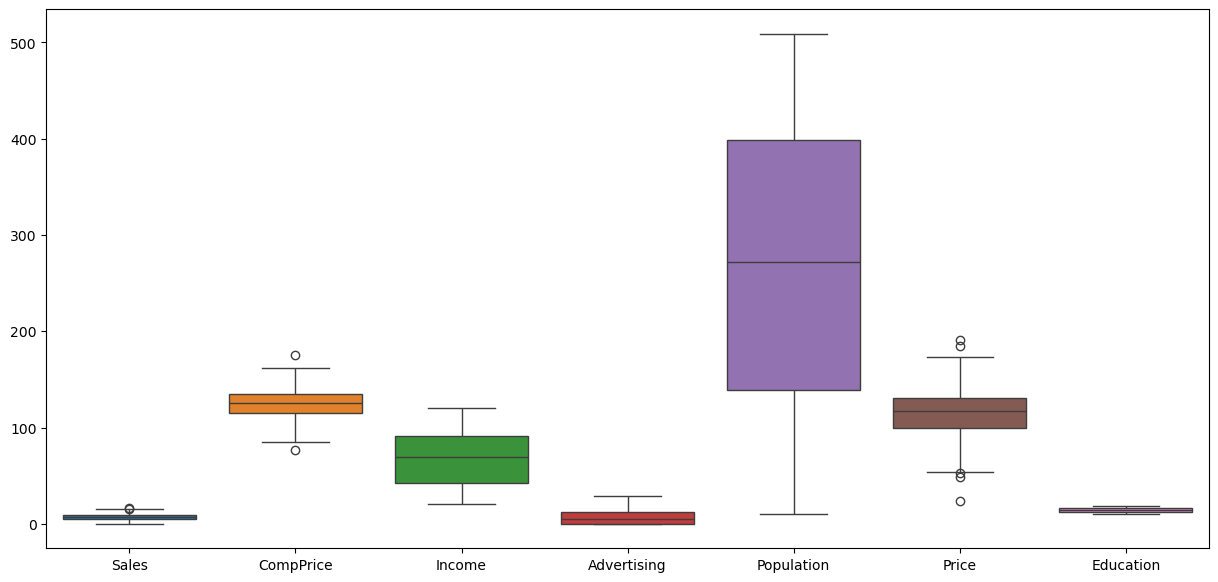

In [292]:
#BOXPLOT
plt.figure(figsize=(15,7))
sns.boxplot(data=df.drop(columns=["ShelveLoc","Age","Urban","US"]))
plt.show()
            
                         

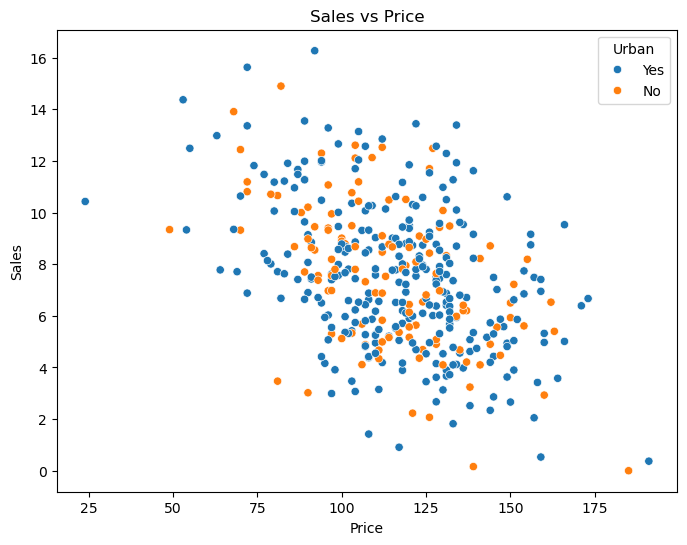

In [293]:
#scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x="Price", y="Sales",data=df,hue="Urban")
plt.title("Sales vs Price")
plt.xlabel("Price")
plt.ylabel("Sales")
plt.show()

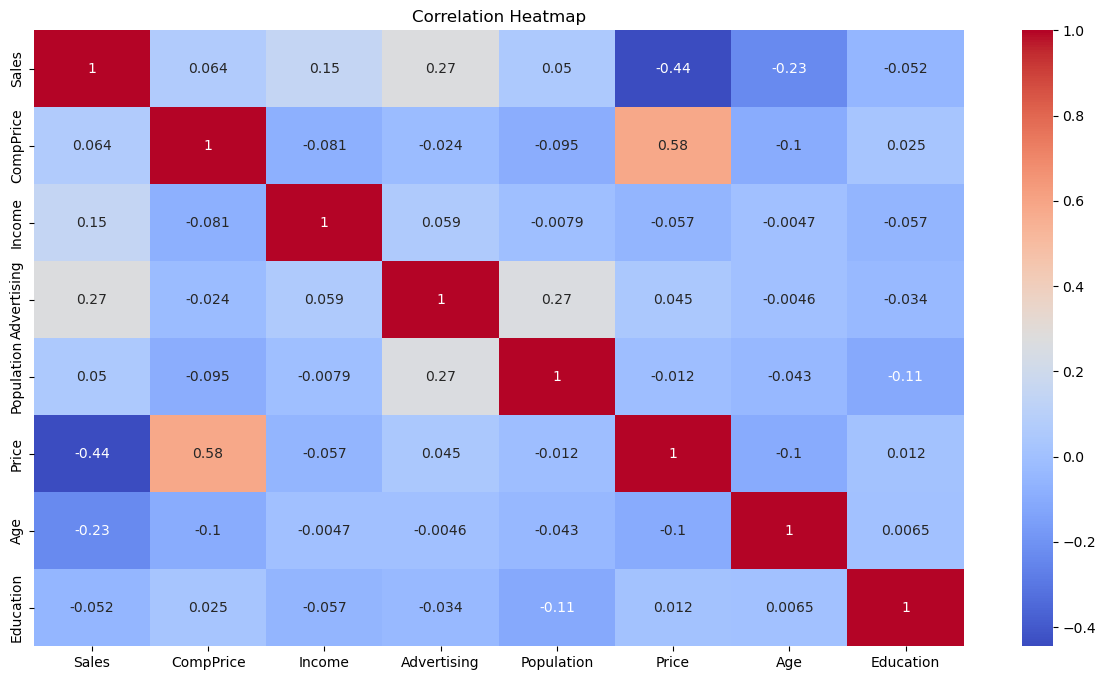

In [295]:
#Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [296]:

#Handeling outliers

def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.where(series < lower, lower,
                    np.where(series > upper, upper, series))

# Apply to numeric columns
for col in ["Sales", "CompPrice", "Income", "Advertising", "Price", "Age", "Education"]:
    df[col] = cap_outliers(df[col])

In [298]:
from sklearn.preprocessing import LabelEncoder

# Ordinal encoding for Shelf Location
shelf_mapping = {"Bad": 0, "Medium": 1, "Good": 2}
df["ShelveLoc"] = df["ShelveLoc"].map(shelf_mapping)



In [302]:
# Label encoding for Urban and US
le = LabelEncoder()
df["Urban"] = le.fit_transform(df["Urban"])   # Yes=1, No=0
df["US"] = le.fit_transform(df["US"])         # Yes=1, No=0

In [304]:
#create 3 categories for Sales
y = pd.cut(df["Sales"], bins=[0, 8, 16, 30], labels=["Low", "Medium", "High"])

In [306]:
# Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [308]:
print("Missing values per column:\n", X_train.isnull().sum())
print("Missing in target (y_train):", y_train.isnull().sum())

Missing values per column:
 CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64
Missing in target (y_train): 1


In [311]:
# Remove rows where target is NaN
train_mask = y_train.notna()

X_train = X_train[train_mask]
y_train = y_train[train_mask]


In [313]:
print("Any NaN left in y_train?", y_train.isnull().any())
print("Shape after cleaning:", X_train.shape, y_train.shape)


Any NaN left in y_train? False
Shape after cleaning: (319, 10) (319,)


In [315]:
test_mask = y_test.notna()
X_test = X_test[test_mask]
y_test = y_test[test_mask]


# Decision Tree (Basic model)

In [318]:
#Decision Tree(Basic Model)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [320]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [322]:
y_pred=dt.predict(X_test)

In [324]:
print("Decision Tree Accuracy:", accuracy_score(y_test,y_pred))

Decision Tree Accuracy: 0.8125


# Hyperparameter Tuning

In [327]:
from sklearn.model_selection import GridSearchCV

In [329]:
param_grid={'max_depth':[3,5,7,None],
            'min_samples_split':[2,5,10],
            'criterion':['gini','entropy']
           }

In [331]:
grid=GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_split': [2, 5, 10]})

In [335]:
best_dt=grid.best_estimator_
print("Best Parameter:",grid.best_params_)

Best Parameter: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}


# Random Forest, Bagging & Boosting

In [340]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,AdaBoostClassifier, GradientBoostingClassifier

In [346]:
rf=RandomForestClassifier(random_state=42)
bag=BaggingClassifier(estimator=DecisionTreeClassifier(),random_state=42)
ada=AdaBoostClassifier(random_state=42)
gb=GradientBoostingClassifier(random_state=42)


In [386]:
results={}

In [388]:
models={"Decision Tree":dt,
        "Tuned Decision tree":best_dt,
        "Random Forest": rf,
        "Bagging":bag,
        "AdaBoost":ada,
        "Gradient Boosting":gb}


In [390]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    results[name] = accuracy_score(y_test, y_pred)

In [398]:
print(results)

{'Decision Tree': 0.8125, 'Tuned Decision tree': 0.8, 'Random Forest': 0.7625, 'Bagging': 0.75, 'AdaBoost': 0.8375, 'Gradient Boosting': 0.825}


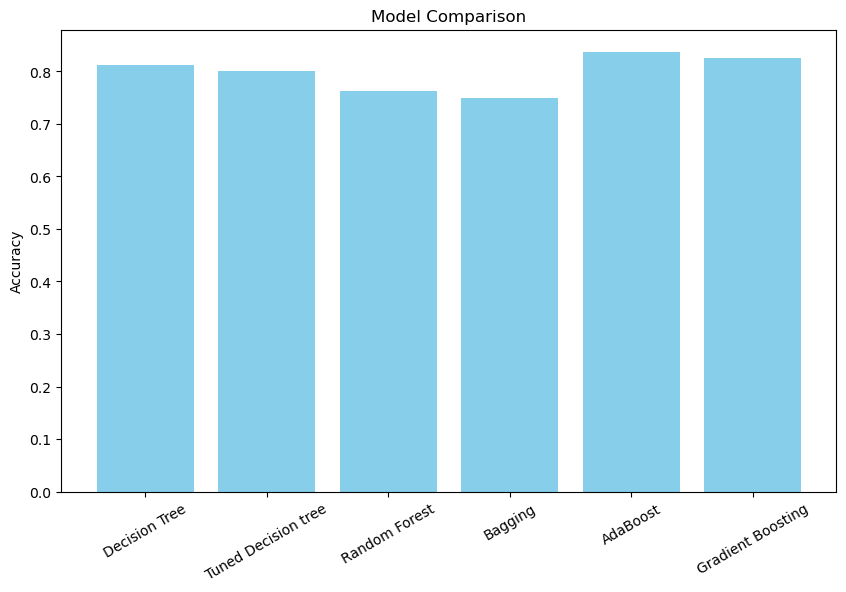

In [392]:
#plot bar chart

plt.figure(figsize=(10,6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=30)
plt.show()

# Conclusions:

Feature Importance: Shelf Location, Price, Advertising, and Competitor Price are typically top drivers of Sales.

# Model Performance:

Basic Decision Tree may overfit, giving moderate accuracy.

Random Forest improves generalization by reducing variance.

Bagging works similarly but less powerful than RF.

Boosting (AdaBoost/GradientBoosting) often gives the highest accuracy by sequentially improving weak learners.

# Best Model: In most cases, Gradient Boosting or Random Forest perform best.

# Business Insight:

Better shelf location and advertising increase sales.

Price sensitivity plays a strong role.

Competitor pricing influences market share.